In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

pearson = pearsonr (street, garage)
f'Корреляция по Пирсону: {pearson.statistic}'

'Корреляция по Пирсону: -1.0'

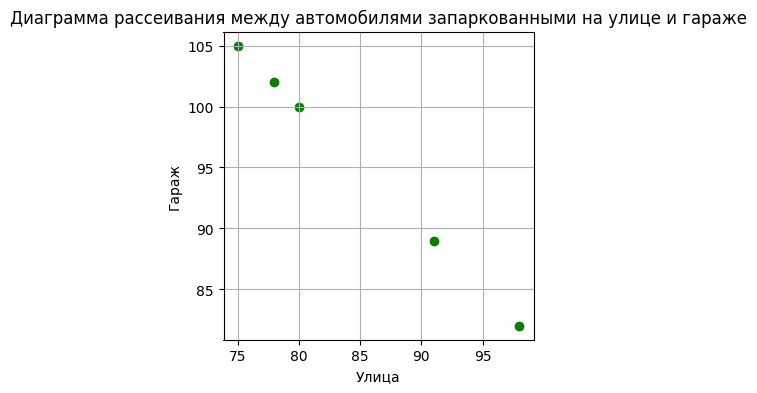

In [33]:
plt.figure(figsize=(4, 4))
plt.scatter(street, garage, color='green')
plt.title('Диаграмма рассеивания между автомобилями запаркованными на улице и гараже')
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.grid(True)
plt.show()

In [34]:
import pandas as pd
from sklearn.metrics import mean_squared_error
data = {
    'Улица': [80, 98, 75, 91, 78],
    'Гараж': [100, 82, 105, 89, 102]
}
df = pd.DataFrame (data)
df

,Улица,Гараж
0,80,100
1,98,82
2,75,105
3,91,89
4,78,102


In [35]:
matr = df.corr()
max = matr['Улица'].drop('Улица').idxmax()

print(f'Корреляционная матрица:\n{matr}')
print(f'Наиболее коррелируящая переменная: {max}')

Корреляционная матрица:
       Улица  Гараж
Улица    1.0   -1.0
Гараж   -1.0    1.0
Наиболее коррелируящая переменная: Гараж


In [36]:
x = df ['Гараж'].values
y = df['Улица'].values

xLength = len(x)
xMean = np.mean(x)
yMean = np.mean(y)
num = np.sum((x - xMean) * (y - yMean))
minus = np.sum((x - xMean)**2)
naklon = num / minus
sdvig = yMean - naklon * xMean
yPredict = naklon * x + sdvig
mse = mean_squared_error(y, yPredict)
print(f'Наклон: {naklon}')
print(f'Сдвиг: {sdvig}')
print(f'MSE: {mse}')

Наклон: -1.0
Сдвиг: 180.0
MSE: 0.0


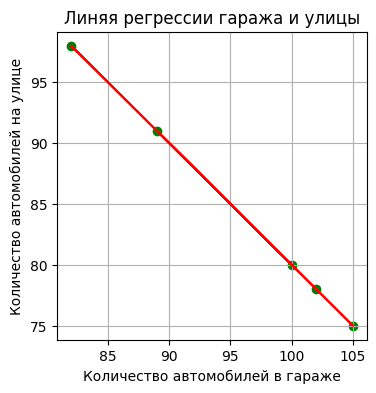

In [37]:
plt.figure(figsize=(4,4))
plt.scatter(x, y, color='green')
plt.plot(x, yPredict, color='red')
plt.title('Линяя регрессии гаража и улицы')
plt.xlabel('Количество автомобилей в гараже')
plt.ylabel('Количество автомобилей на улице')
plt.grid()
plt.show()

In [38]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
f'Уникальные регионы: {df["region"].unique()}'

"Уникальные регионы: ['southwest' 'southeast' 'northwest' 'northeast']"

In [40]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

unique_regions = df['region'].unique()
bmi_by_region = [df [df ['region'] == region] ['bmi'] for region in unique_regions]
anova = stats.f_oneway(*bmi_by_region)
f'Однофакторный ANOVA тест, используя первый способ: {anova.statistic}'

'Однофакторный ANOVA тест, используя первый способ: 39.49505720170283'

In [41]:
model_for_anova_lm = ols('bmi ~ C(region)', data=df).fit()
anova = anova_lm(model_for_anova_lm)
f'Однофакторный ANOVA тест, используя второй способ: \n {anova}'

'Однофакторный ANOVA тест, используя второй способ: \n                df        sum_sq      mean_sq          F        PR(>F)\nC(region)     3.0   4055.880631  1351.960210  39.495057  1.881839e-24\nResidual   1334.0  45664.319755    34.231124        NaN           NaN'

In [42]:
values = []
regions = list(combinations(unique_regions, 2))
for first_region, second_region in regions:
    first_bmi = df[df['region'] == first_region]['bmi']
    second_bmi = df[df['region'] == second_region]['bmi']
    ttest = stats.ttest_ind(first_bmi, second_bmi)
    values.append(ttest.pvalue)
bonferroni = multipletests (values, alpha=0.05, method='bonferroni')
f'Переборка всех пар и определение поправки Бонферрони: \n {list(zip(regions, bonferroni[1]))}'

"Переборка всех пар и определение поправки Бонферрони: \n [(('southwest', 'southeast'), 3.2624405783808385e-08), (('southwest', 'northwest'), 0.006461750977846171), (('southwest', 'northeast'), 0.011451697002943847), (('southeast', 'northwest'), 1.5861428431380637e-18), (('southeast', 'northeast'), 7.116089624548878e-17), (('northwest', 'northeast'), 1.0)]"

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


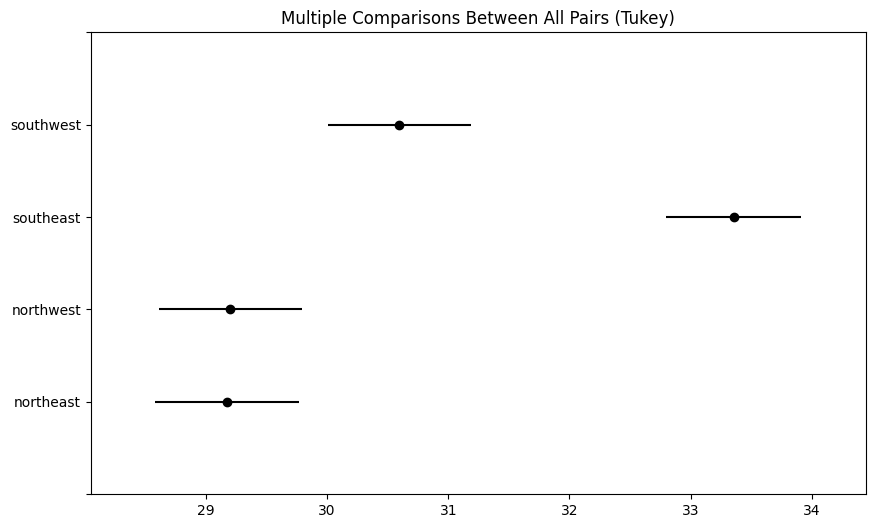

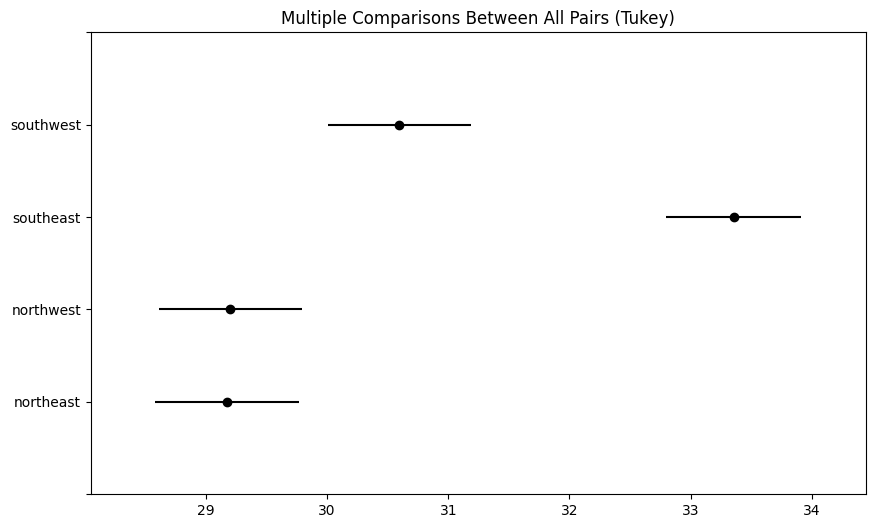

In [43]:
tukey = pairwise_tukeyhsd(df['bmi'], df['region'])
print(tukey)
tukey.plot_simultaneous()

In [44]:
model = ols('bmi ~ C(region) + C(sex) + C(region): C(sex)', data=df).fit()
anova = anova_lm(model)
f'Двухфакторный ANOVA тест: \n {anova}'

'Двухфакторный ANOVA тест: \n                       df        sum_sq      mean_sq          F        PR(>F)\nC(region)            3.0   4055.880631  1351.960210  39.602259  1.636858e-24\nC(sex)               1.0     86.007035    86.007035   2.519359  1.126940e-01\nC(region):C(sex)     3.0    174.157808    58.052603   1.700504  1.650655e-01\nResidual          1330.0  45404.154911    34.138462        NaN           NaN'

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
northeast&female   northeast&male  -0.2998 0.9998 -2.2706  1.6711  False
northeast&female northwest&female  -0.0464    1.0 -2.0142  1.9215  False
northeast&female   northwest&male  -0.2042    1.0 -2.1811  1.7728  False
northeast&female southeast&female   3.3469    0.0    1.41  5.2839   True
northeast&female   southeast&male   4.6657    0.0  2.7634   6.568   True
northeast&female southwest&female   0.7362 0.9497 -1.2377    2.71  False
northeast&female   southwest&male   1.8051 0.1007 -0.1657   3.776  False
  northeast&male northwest&female   0.2534 0.9999 -1.7083  2.2152  False
  northeast&male   northwest&male   0.0956    1.0 -1.8752  2.0665  False
  northeast&male southeast&female   3.6467    0.0  1.7159  5.5775   True
  northeast&male   southeast&male   4.9655    0.0  

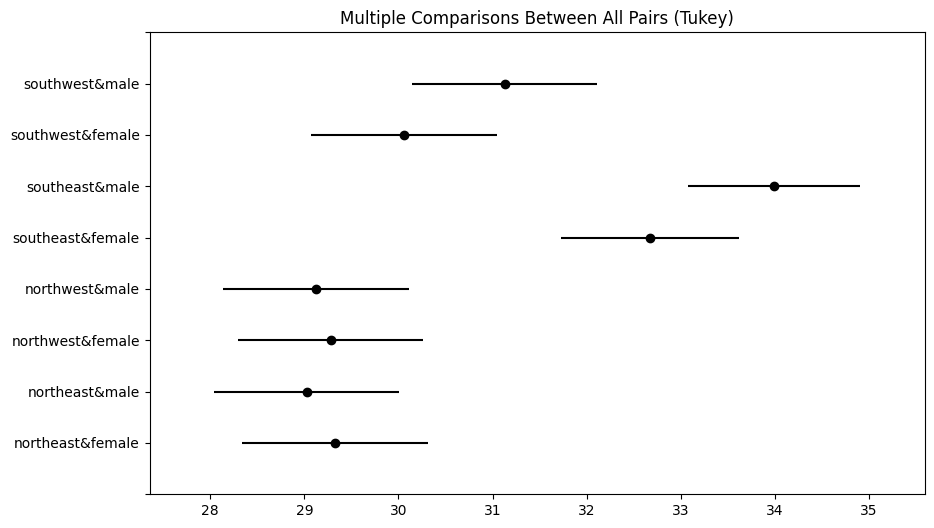

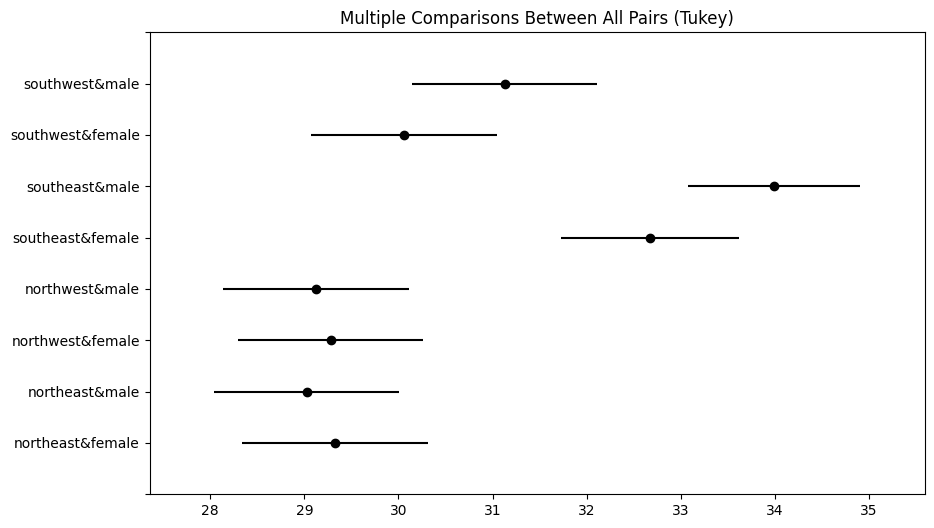

In [45]:
tukey = pairwise_tukeyhsd(df['bmi'], df['region'] + '&' + df ['sex'])
print(tukey)
tukey.plot_simultaneous()